imports

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import pickle
%matplotlib inline

Read data

In [89]:
df = pd.read_csv('../data/attrition-formated.csv')

prepare data

In [90]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IsMale
0,41,1,1,1102,1,2,Life Sciences,1,2,94,...,80,0,8,0,1,6,4,0,5,0
1,49,0,2,279,8,1,Life Sciences,2,3,61,...,80,1,10,3,3,10,7,1,7,1
2,37,1,1,1373,2,2,Other,4,4,92,...,80,0,7,3,3,0,0,0,0,1
3,33,0,2,1392,3,4,Life Sciences,5,4,56,...,80,0,8,3,3,8,7,3,0,0
4,27,0,1,591,2,1,Medical,7,1,40,...,80,1,6,3,3,2,2,2,2,1


In [91]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [92]:
df = pd.get_dummies(df, columns = ['EducationField'] )

In [93]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'IsMale', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree'],
      dtype='object')

Correlations

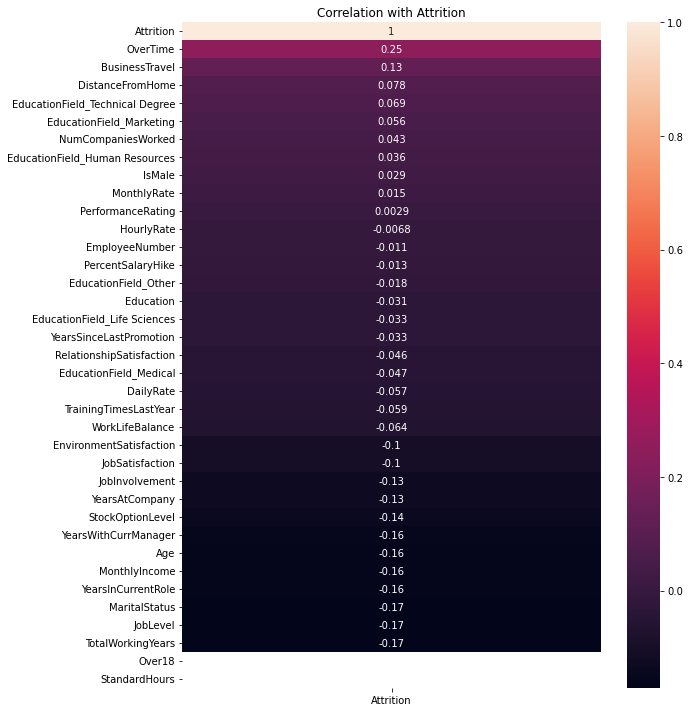

In [94]:
c = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(c[['Attrition']].sort_values('Attrition', ascending = False),annot=True);
plt.title('Correlation with Attrition')
plt.tight_layout()
plt.savefig('../output/heatmap.png');


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

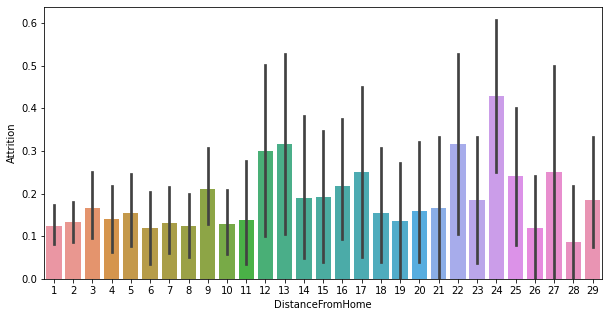

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'DistanceFromHome', y = 'Attrition', data=df)


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

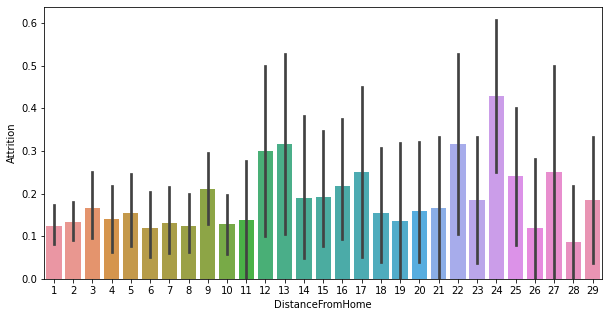

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'DistanceFromHome', y = 'Attrition', data=df, fill=True)

<AxesSubplot:xlabel='HourlyRate', ylabel='Attrition'>

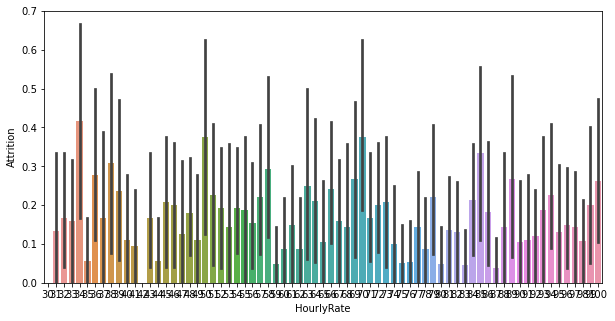

In [97]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'HourlyRate', y = 'Attrition', data=df, fill=True)

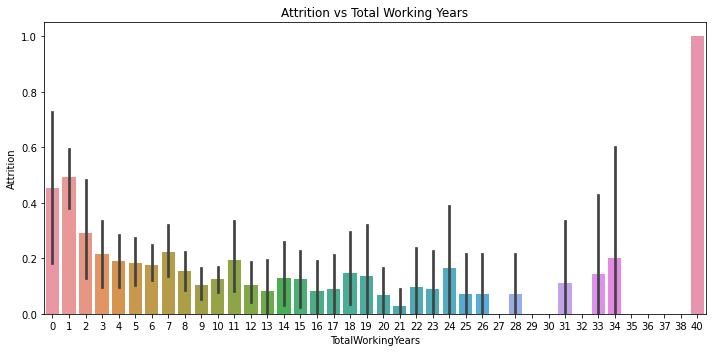

In [98]:
plt.figure(figsize=(10,5))
plt.title('Attrition vs Total Working Years')
sns.barplot(x = 'TotalWorkingYears', y = 'Attrition', data=df);
plt.tight_layout()
plt.savefig('../output/attr-vs-work.png');

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Attrition'>

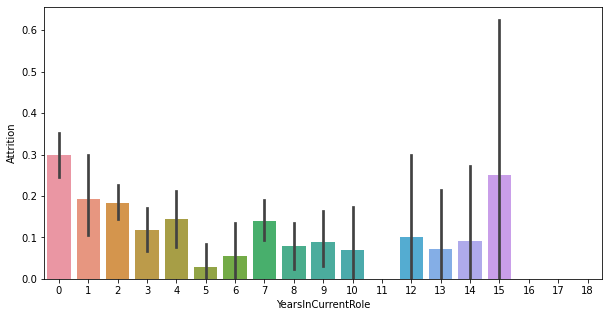

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'YearsInCurrentRole', y = 'Attrition', data=df)

None of the observed datapoints have a very strong pearson correlation with attrition, however looking at individual plots was helpful. The below plots were generated by the application.

<img src='../output/attrition-vs-age.png' ></img>
<img src='../output/income.png' ></img>
<img src='../output/income.png' ></img>
<img src='../output/education.png' ></img>

<h2>Initial Modeling</h2>

In [100]:
df.dropna(inplace=True)

In [ ]:
logreg = LogisticRegression(max_iter = 2000 )
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Attrition']), df['Attrition'], stratify = df['Attrition'])
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg.fit(X_train, y_train)

In [102]:
logreg.fit(X_train, y_train, )

LogisticRegression(max_iter=2000)

In [103]:
logreg.score(X_test, y_test), logreg.score(X_train, y_train)

(0.8986013986013986, 0.8798133022170361)

In [104]:
coefs = pd.DataFrame(logreg.coef_).T
coefs.columns = ['coefs']
coefs['abs'] = abs(coefs['coefs'])
coefs['name'] = df.drop(columns=['Attrition']).columns


In [105]:
coefs.sort_values('abs', ascending=False)

,coefs,abs,name
16,0.763954,0.763954,OverTime
26,-0.659526,0.659526,YearsInCurrentRole
22,-0.530455,0.530455,TotalWorkingYears
10,-0.489397,0.489397,JobSatisfaction
25,0.438379,0.438379,YearsAtCompany
3,0.367545,0.367545,DistanceFromHome
1,0.363056,0.363056,BusinessTravel
27,0.355460,0.355460,YearsSinceLastPromotion
11,-0.322608,0.322608,MaritalStatus
8,-0.306831,0.306831,JobInvolvement


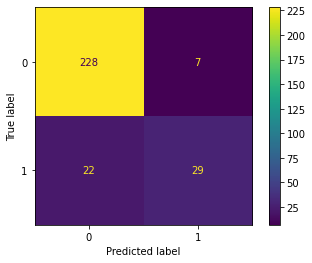

In [106]:
metrics.plot_confusion_matrix(logreg, X_test, y_test)

In [107]:
with open('../pickles/train_test.pkl', 'wb') as pickle_out:
    pickle.dump((X_train, X_test, y_train, y_test), pickle_out)

In [108]:
metrics.recall_score(y_test, logreg.predict(X_test))

0.5686274509803921

In [109]:
logreg.score(X_test, y_test)

0.8986013986013986

In [110]:
with open('../pickles/train_test_rs.pkl', 'rb') as pickle_in:
    X_train, X_test, y_train, y_test = pickle.load(pickle_in)

In [111]:
df2 = pd.read_csv('../data/attrition-formated.csv')
df2.dropna(inplace=True)
df2.drop(columns='EmployeeNumber', inplace=True)
df['Attrition'].mean()
sc = StandardScaler()
df2 = pd.get_dummies(df2, columns = ['EducationField'] )
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['Attrition']), df2['Attrition'], stratify = df2['Attrition'])
X_train_df = pd.DataFrame(X_train)
X_train_df['Attrition'] = y_train
rs = X_train_df[X_train_df['Attrition'] == 1].sample(500, replace = True)

X_train_df = pd.concat([X_train_df, rs])
X_train_df['Attrition'].mean()
X_train = sc.fit_transform(X_train_df.drop(columns=['Attrition']))
y_train = X_train_df['Attrition']
X_test = sc.transform(X_test)

In [112]:
with open('../pickles/sc.pkl', 'wb') as pickle_out:
    pickle.dump(sc, pickle_out)

In [113]:
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'IsMale', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree'],
      dtype='object')

In [114]:
with open('../pickles/train_test_rs.pkl', 'wb') as pickle_out:
    pickle.dump((X_train, X_test, y_train, y_test), pickle_out)

In [115]:
logreg.fit(X_train, y_train, )

LogisticRegression(max_iter=2000)

In [116]:
logreg.score(X_test, y_test), logreg.score(X_train, y_train)

(0.7447552447552448, 0.7877671333824613)

In [117]:
metrics.recall_score(y_test, logreg.predict(X_test))

0.7058823529411765

In [118]:
metrics.recall_score(y_train, logreg.predict(X_train))

0.776416539050536

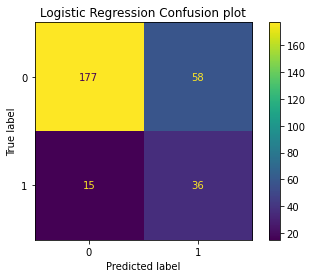

In [119]:
metrics.plot_confusion_matrix(logreg, X_test, y_test)
plt.title('Logistic Regression Confusion plot')
plt.savefig('../output/logreg.png')

In [120]:
y_test.value_counts()

0    235
1     51
Name: Attrition, dtype: int64

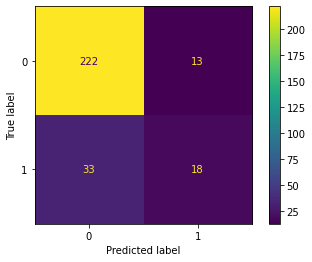

In [121]:
import warnings
warnings.filterwarnings('ignore')
pf = PolynomialFeatures(3)
X_tr = pf.fit_transform(X_train)
X_te= pf.transform(X_test)
logreg = LogisticRegression()
params = {
    'penalty': ['l2'],
    'C':[0.5, 1,]
    
     

}


gs = GridSearchCV(logreg,params,scoring=metrics.recall_score )
gs.fit(X_tr, y_train)
metrics.recall_score(y_test, gs.predict(X_te)), metrics.accuracy_score(y_test, gs.predict(X_te)), gs.best_params_
metrics.plot_confusion_matrix(gs, X_te, y_test)

In [122]:
logreg2 = LogisticRegression(C=0.5)
vc = VotingClassifier([('logreg',logreg), ('gs',logreg2)], 'soft')
pf = PolynomialFeatures(3)
X_tr = pf.fit_transform(X_train)
X_te= pf.transform(X_test)
logreg = LogisticRegression()
params = {
    'gs__penalty': ['l2'],
    'gs__C':[0.5, 1,]
    
     

}


gs = GridSearchCV(vc,params,scoring=metrics.recall_score )
gs.fit(X_tr, y_train)


GridSearchCV(estimator=VotingClassifier(estimators=[('logreg',
                                                     LogisticRegression()),
                                                    ('gs',
                                                     LogisticRegression(C=0.5))],
                                        voting='soft'),
             param_grid={'gs__C': [0.5, 1], 'gs__penalty': ['l2']},
             scoring=<function recall_score at 0x7f1aa93c6f70>)

(0.35294117647058826, 0.8391608391608392)

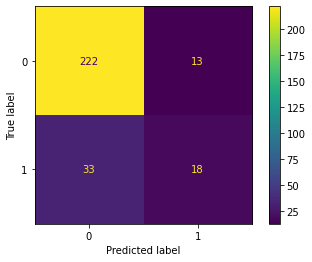

In [123]:

metrics.plot_confusion_matrix(gs, X_te, y_test)
metrics.recall_score(y_test, gs.predict(X_te)), metrics.accuracy_score(y_test, gs.predict(X_te))

In [ ]:
metrics.plot_confusion_matrix(gs, X_test, y_test)

In [ ]:
import cgoss